In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from scipy.stats import linregress

from sklearn import datasets

In [2]:
file = "Merged/merged_data.csv"
df = pd.read_csv(file)
df

,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,128.4,7.3,114.8,3.6,109.1,6.80,2.21,0.6502
402,Dec-2022,555690.0,2.7,130.8,7.8,107.9,3.5,108.8,7.55,3.01,0.6775
403,Mar-2023,NaN,NaN,NaN,NaN,106.2,NaN,NaN,NaN,3.51,0.6712
404,Jun-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [4]:
cpi_df = df.loc[:, ["Month", "CPI", "Percent CPI", "Cash Rate (%)"]]
cpi_df

,Month,CPI,Percent CPI,Cash Rate (%)
0,Jun-1922,2.8,NaN,NaN
1,Sep-1922,2.8,NaN,NaN
2,Dec-1922,2.7,NaN,NaN
3,Mar-1923,2.7,NaN,NaN
4,Jun-1923,2.8,2.3,NaN
...,...,...,...,...
401,Sep-2022,128.4,7.3,2.21
402,Dec-2022,130.8,7.8,3.01
403,Mar-2023,NaN,NaN,3.51
404,Jun-2023,NaN,NaN,NaN


In [5]:
inter_cpi_df = cpi_df.loc[(cpi_df["Cash Rate (%)"] >= 0) & (cpi_df["CPI"] >= 0) & (cpi_df["Percent CPI"] >= 0)]
inter_cpi_df.head()

,Month,CPI,Percent CPI,Cash Rate (%)
216,Jun-1976,17.7,12.0,8.02
217,Sep-1976,18.1,13.8,7.46
218,Dec-1976,19.2,14.3,6.37
219,Mar-1977,19.6,13.3,7.58
220,Jun-1977,20.1,13.6,9.52


In [6]:
# Get column for Percent CPI
cpi = inter_cpi_df["Percent CPI"]


In [7]:
# Get column for Cash rate
cash_rate = inter_cpi_df["Cash Rate (%)"]

In [8]:
# Get column for Month and store as X_Axis variable for plotting
x_axis = inter_cpi_df["Month"]
x_axis

216    Jun-1976
217    Sep-1976
218    Dec-1976
219    Mar-1977
220    Jun-1977
         ...   
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, Length: 183, dtype: object

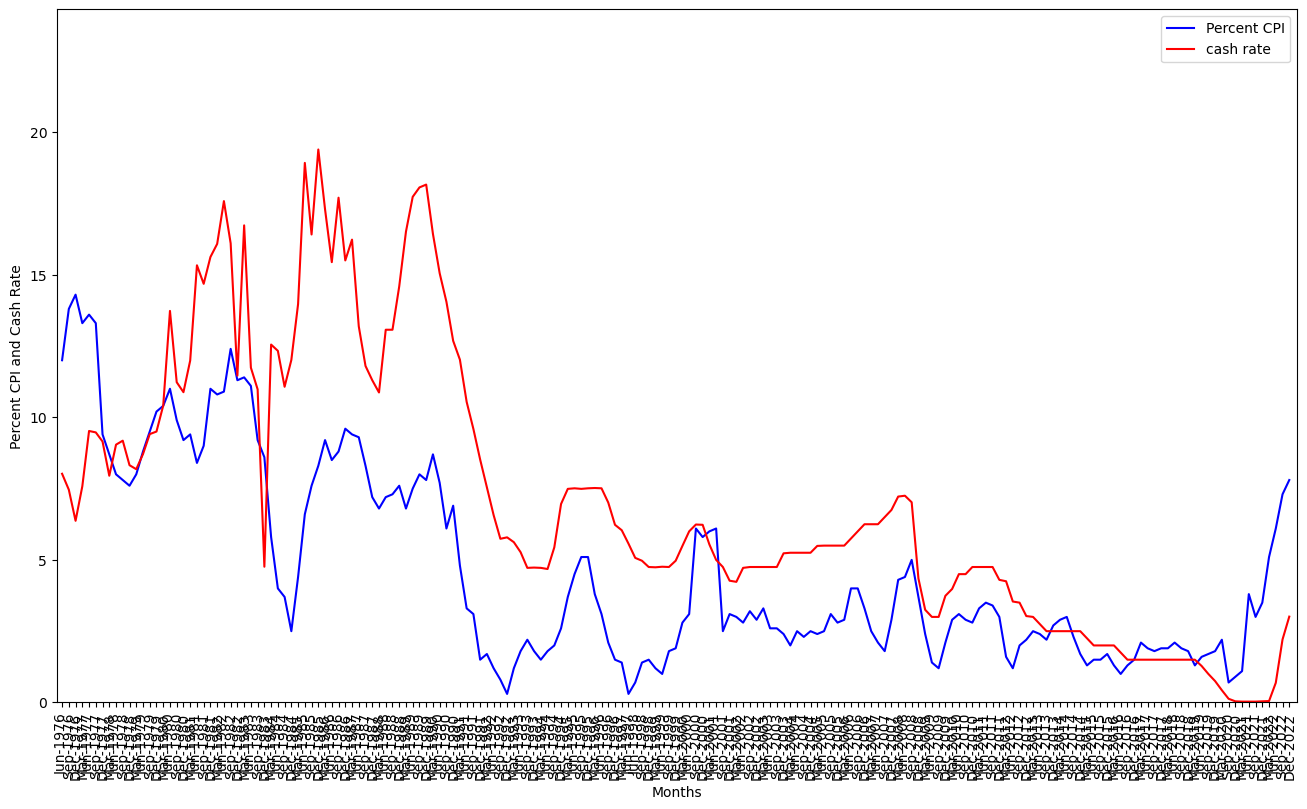

In [9]:
# PLot CPI and cash rate vs Month
plt.figure(figsize = (16,9))
cpi2, = plt.plot(x_axis, cpi, color = "blue", label = "Percent CPI")
cashrate = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(inter_cpi_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("Percent CPI and Cash Rate")
plt.xlim(-0.75, len(inter_cpi_df["Month"])+0.15)
plt.ylim(0, max(inter_cpi_df["Percent CPI"])+10)
plt.savefig("Output/Percent CPI and cash rate over time.png")
plt.show()


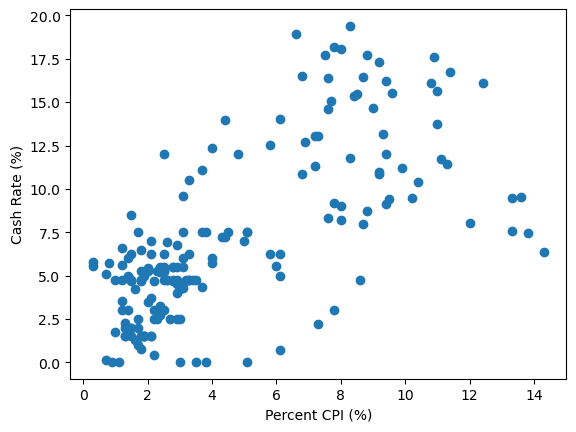

In [10]:
# Cash rate VS Percent CPI
plt.scatter(inter_cpi_df.iloc[:,2], inter_cpi_df.iloc[:,3])
plt.xlabel('Percent CPI (%)')
plt.ylabel('Cash Rate (%)')
plt.show()

In [11]:
inter_cpi_df.iloc[:,3]

216    8.02
217    7.46
218    6.37
219    7.58
220    9.52
       ... 
398    0.04
399    0.05
400    0.69
401    2.21
402    3.01
Name: Cash Rate (%), Length: 183, dtype: float64

In [12]:
#calculate correlation between Percent CPI and Cash rate
cpi2 = inter_cpi_df.iloc[:,2]
cash_rate = inter_cpi_df.iloc[:,3]
correlation = st.pearsonr(cpi2,cash_rate)
print(f'The correlation between Percent CPI and Cash Rate is {round(correlation[0],2)}')

The correlation between Percent CPI and Cash Rate is 0.69


The r-squared is: 0.47450708438332634


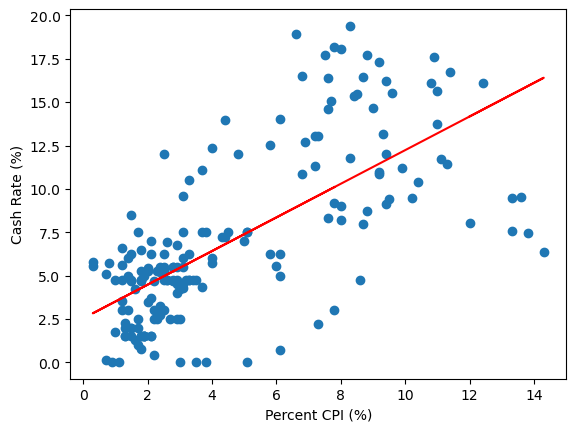

<Figure size 640x480 with 0 Axes>

In [13]:
#Print out the r-squared value along with the plot
x_values = inter_cpi_df["Percent CPI"]
y_values = inter_cpi_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,1),fontsize = 15, color = "red")
plt.xlabel('Percent CPI (%)')
plt.ylabel('Cash Rate (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Output/Correlation Percent CPI vs cash rate over time.png")

In [14]:
inter_cpi_df.tail(15)

,Month,CPI,Percent CPI,Cash Rate (%)
387,Mar-2019,114.1,1.3,1.50
388,Jun-2019,114.8,1.6,1.28
389,Sep-2019,115.4,1.7,1.00
390,Dec-2019,116.2,1.8,0.75
391,Mar-2020,116.6,2.2,0.43
393,Sep-2020,116.2,0.7,0.13
394,Dec-2020,117.2,0.9,0.04
395,Mar-2021,117.9,1.1,0.03
396,Jun-2021,118.8,3.8,0.03
397,Sep-2021,119.7,3.0,0.03


In [15]:
# Remove 2021 data from dataframe
filtered_df = inter_cpi_df.iloc[:-8]

In [16]:
filtered_df.tail(15)

,Month,CPI,Percent CPI,Cash Rate (%)
379,Mar-2017,110.5,2.1,1.50
380,Jun-2017,110.7,1.9,1.50
381,Sep-2017,111.4,1.8,1.50
382,Dec-2017,112.1,1.9,1.50
383,Mar-2018,112.6,1.9,1.50
384,Jun-2018,113.0,2.1,1.50
385,Sep-2018,113.5,1.9,1.50
386,Dec-2018,114.1,1.8,1.50
387,Mar-2019,114.1,1.3,1.50
388,Jun-2019,114.8,1.6,1.28


In [17]:
cpi_no2021 = filtered_df["Percent CPI"]
cash_rate_no2021 = filtered_df["Cash Rate (%)"]
x_axis_no2021 = filtered_df["Month"]

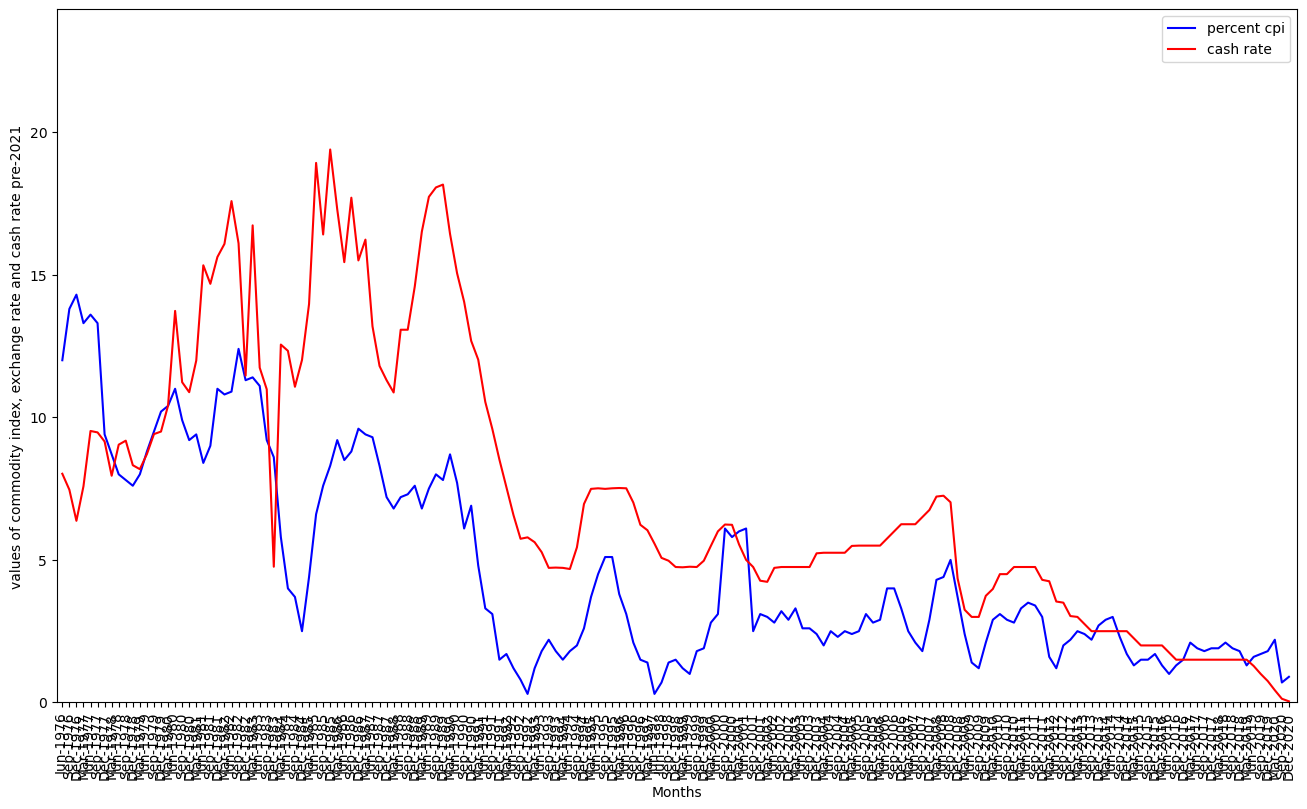

In [18]:
# Cash rate VS Percent CPI, pre-2021
plt.figure(figsize = (16,9))
cpi_rate_no2021, = plt.plot(x_axis_no2021, cpi_no2021, color = "blue", label = "percent cpi")
cashrate_no2021 = plt.plot(x_axis_no2021, cash_rate_no2021,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(filtered_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("values of commodity index, exchange rate and cash rate pre-2021")
plt.xlim(-0.75, len(filtered_df["Month"])+0.15)
plt.ylim(0, max(filtered_df["Percent CPI"])+10)
plt.savefig("Output/Percent CPI and cash rate over time pre 2021.png")
plt.show()

In [19]:
#calculate correlation between Percent CPI and Cash rate
cpi_no2021 = filtered_df.iloc[:,2]
cash_rate_no2021 = filtered_df.iloc[:,3]
correlation_no2021 = st.pearsonr(cpi_no2021,cash_rate_no2021)
print(f'The correlation between Percent CPI and Cash Rate, pre-2021 is {round(correlation_no2021[0],2)}')


The correlation between Percent CPI and Cash Rate, pre-2021 is 0.72


The r-squared is: 0.5184803118129917


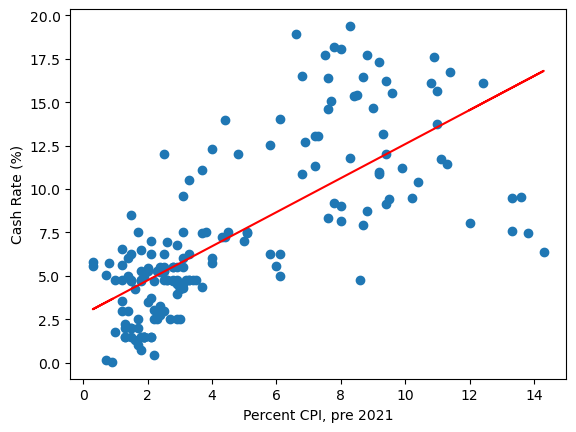

<Figure size 640x480 with 0 Axes>

In [20]:
#Print out the r-squared value along with the plot
x_values_no2021 = filtered_df["Percent CPI"]
y_values_no2021 = filtered_df["Cash Rate (%)"]
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values_no2021, y_values_no2021)
regress_values2 = x_values_no2021 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.scatter(x_values_no2021, y_values_no2021)
plt.plot(x_values_no2021,regress_values2,"r-")
plt.annotate(line_eq2,(90,1),fontsize = 15, color = "red")
plt.xlabel('Percent CPI, pre 2021')
plt.ylabel('Cash Rate (%)')
print(f"The r-squared is: {rvalue2**2}")
plt.show()

plt.savefig("Output/Correlation Percent CPI and cash rate over time pre 2021.png")

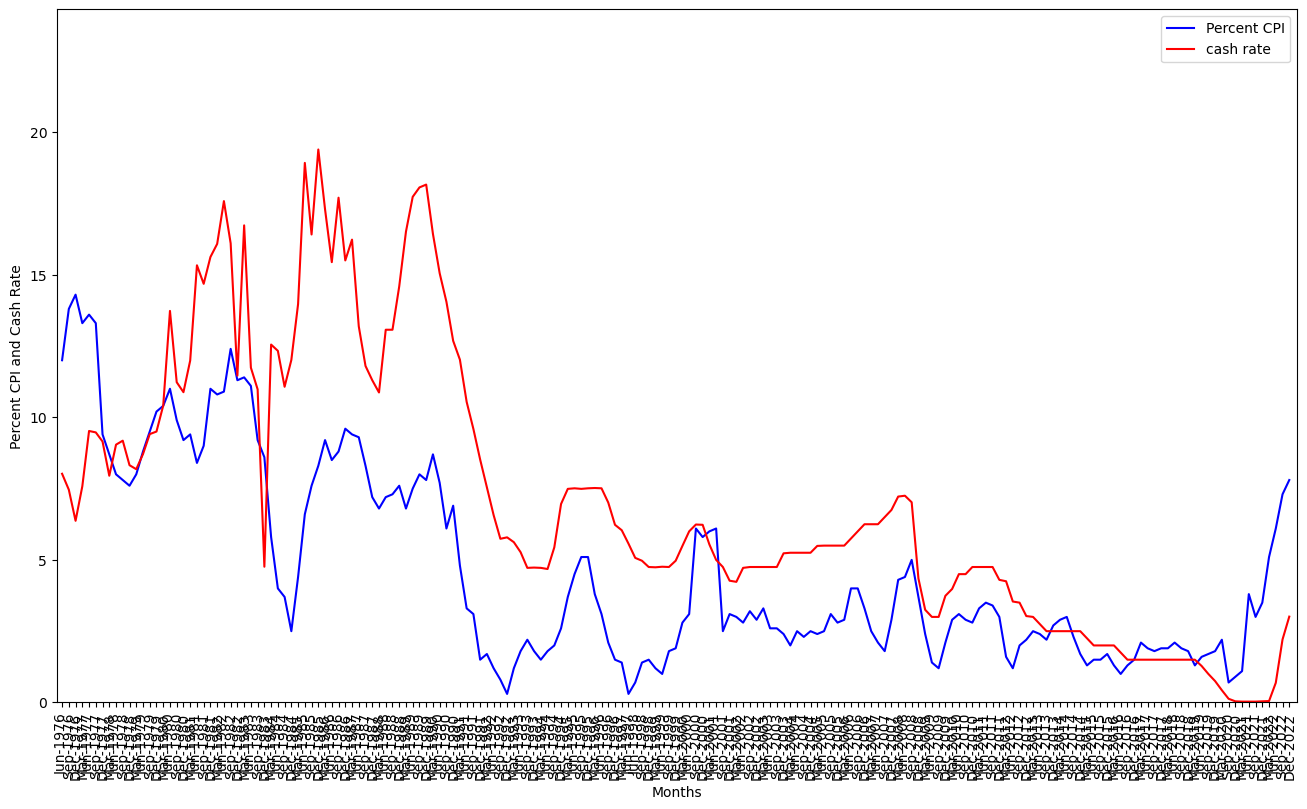

In [21]:
# PLot CPI and cash rate vs Month
plt.figure(figsize = (16,9))
cpi2, = plt.plot(x_axis, cpi, color = "blue", label = "Percent CPI")
cashrate = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(inter_cpi_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("Percent CPI and Cash Rate")
plt.xlim(-0.75, len(inter_cpi_df["Month"])+0.15)
plt.ylim(0, max(inter_cpi_df["Percent CPI"])+10)
plt.savefig("Output/Percent CPI and cash rate over time.png")
plt.show()

In [22]:
gdp_df = df.loc[:, ["Month", "GDP (million)", "Percent GDP", "Percent CPI", "Cash Rate (%)"]]
gdp_df

,Month,GDP (million),Percent GDP,Percent CPI,Cash Rate (%)
0,Jun-1922,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.3,NaN
...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,7.3,2.21
402,Dec-2022,555690.0,2.7,7.8,3.01
403,Mar-2023,NaN,NaN,NaN,3.51
404,Jun-2023,NaN,NaN,NaN,NaN


In [23]:
gdp_condition_df = gdp_df.loc[(gdp_df["Cash Rate (%)"] >= 0) & (gdp_df["GDP (million)"] >= 0) & (gdp_df["Percent GDP"] >=0) & (gdp_df["Percent CPI"] >=0)]
gdp_condition_df

,Month,GDP (million),Percent GDP,Percent CPI,Cash Rate (%)
216,Jun-1976,140494.0,2.0,12.0,8.02
217,Sep-1976,141630.0,4.0,13.8,7.46
218,Dec-1976,142861.0,6.5,14.3,6.37
219,Mar-1977,142086.0,1.4,13.3,7.58
220,Jun-1977,144099.0,2.6,13.6,9.52
...,...,...,...,...,...
398,Dec-2021,541273.0,4.6,3.5,0.04
399,Mar-2022,544364.0,3.0,5.1,0.05
400,Jun-2022,549274.0,3.1,6.1,0.69
401,Sep-2022,553036.0,5.9,7.3,2.21


In [24]:
# GDP in $ '00 billion (hundreds of billion)
gdp_value = gdp_condition_df["GDP (million)"]/100000
gdp_value

216    1.40494
217    1.41630
218    1.42861
219    1.42086
220    1.44099
        ...   
398    5.41273
399    5.44364
400    5.49274
401    5.53036
402    5.55690
Name: GDP (million), Length: 173, dtype: float64

In [25]:
# GDP in % (year-to-year growth)
gdp_rate = gdp_condition_df["Percent GDP"]
gdp_rate

216    2.0
217    4.0
218    6.5
219    1.4
220    2.6
      ... 
398    4.6
399    3.0
400    3.1
401    5.9
402    2.7
Name: Percent GDP, Length: 173, dtype: float64

In [26]:
cpi9 = gdp_condition_df["Percent CPI"]
cpi9

216    12.0
217    13.8
218    14.3
219    13.3
220    13.6
       ... 
398     3.5
399     5.1
400     6.1
401     7.3
402     7.8
Name: Percent CPI, Length: 173, dtype: float64

In [27]:
# Cash rate
cash_rate9 = gdp_condition_df["Cash Rate (%)"]
cash_rate9

216    8.02
217    7.46
218    6.37
219    7.58
220    9.52
       ... 
398    0.04
399    0.05
400    0.69
401    2.21
402    3.01
Name: Cash Rate (%), Length: 173, dtype: float64

In [28]:
x_axis9 = gdp_condition_df["Month"]
x_axis9

216    Jun-1976
217    Sep-1976
218    Dec-1976
219    Mar-1977
220    Jun-1977
         ...   
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, Length: 173, dtype: object

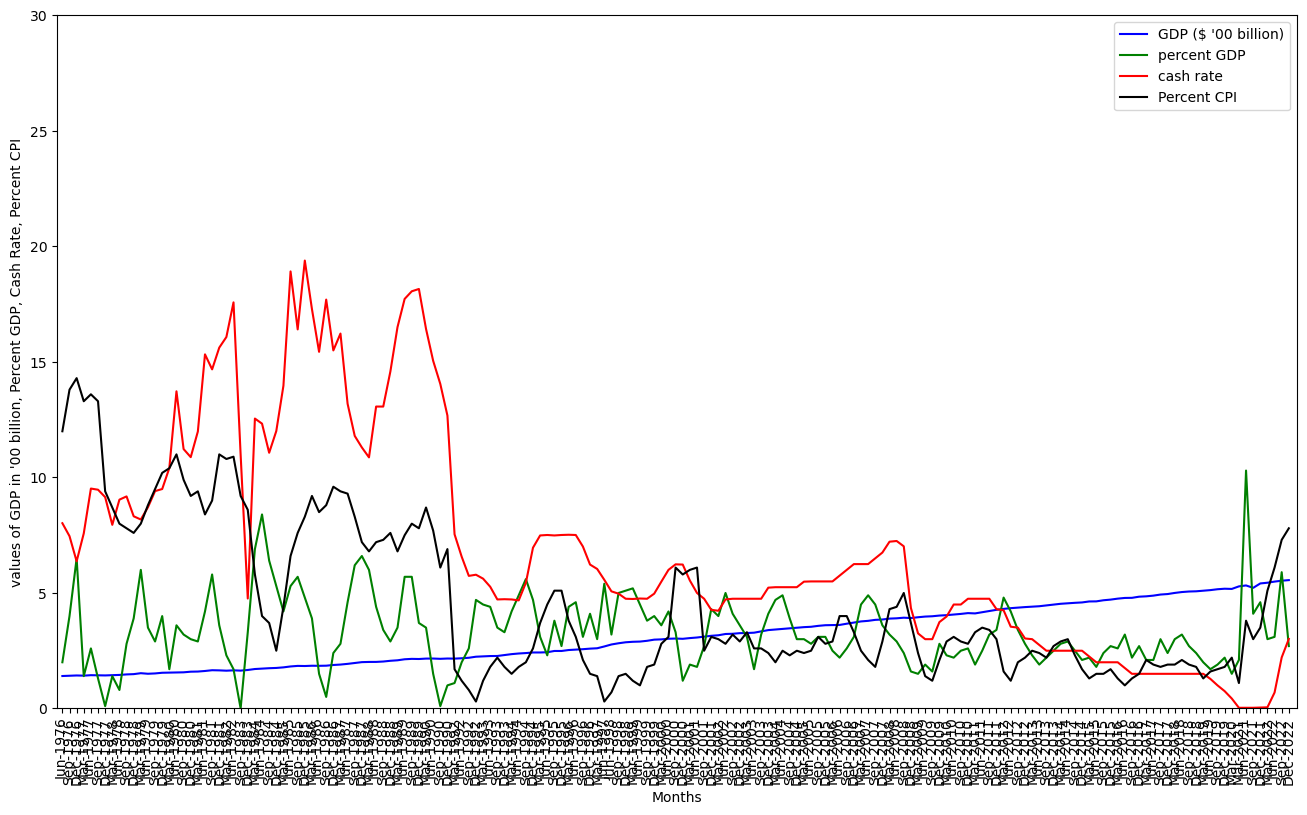

In [29]:
plt.figure(figsize = (16,9))
gdp_val, = plt.plot(x_axis9, gdp_value, color = "blue", label = "GDP ($ '00 billion)")
gdp_perc, = plt.plot(x_axis9, gdp_rate, color = "green", label = "percent GDP")
cashrate = plt.plot(x_axis9, cash_rate9,  color = "red", label = "cash rate")
cpi, = plt.plot(x_axis9, cpi9, color = "black", label = "Percent CPI")
plt.legend(loc="best")
plt.xticks(gdp_condition_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("values of GDP in '00 billion, Percent GDP, Cash Rate, Percent CPI")
plt.xlim(-0.75, len(x_axis9)+0.15)
plt.ylim(0,30)
plt.savefig("Output/GDP_CPI.png")
plt.show()

In [30]:
filtered2_df = gdp_condition_df.iloc[124:]
filtered2_df.head()

,Month,GDP (million),Percent GDP,Percent CPI,Cash Rate (%)
351,Mar-2010,403936.0,2.3,2.9,3.98
352,Jun-2010,406577.0,2.2,3.1,4.50
353,Sep-2010,409344.0,2.5,2.9,4.50
354,Dec-2010,412821.0,2.6,2.8,4.75
355,Mar-2011,411518.0,1.9,3.3,4.75


In [31]:
# GDP in $ '00 billion (hundreds of billion)
gdp_value8 = filtered2_df["GDP (million)"]/100000
gdp_value8

351    4.03936
352    4.06577
353    4.09344
354    4.12821
355    4.11518
356    4.16775
357    4.22471
358    4.27027
359    4.31099
360    4.34262
361    4.36775
362    4.38872
363    4.40847
364    4.42586
365    4.46167
366    4.49767
367    4.53176
368    4.55338
369    4.57366
370    4.59033
371    4.63243
372    4.63652
373    4.68435
374    4.71248
375    4.75461
376    4.78482
377    4.78962
378    4.83900
379    4.85494
380    4.88485
381    4.93166
382    4.95335
383    5.00175
384    5.04005
385    5.06317
386    5.07235
387    5.10008
388    5.12390
389    5.16158
390    5.18390
391    5.17516
395    5.28559
396    5.32583
397    5.22168
398    5.41273
399    5.44364
400    5.49274
401    5.53036
402    5.55690
Name: GDP (million), dtype: float64

In [32]:
# GDP in % (year-to-year growth)
gdp_rate8 = filtered2_df["Percent GDP"]
gdp_rate8

351     2.3
352     2.2
353     2.5
354     2.6
355     1.9
356     2.5
357     3.2
358     3.4
359     4.8
360     4.2
361     3.4
362     2.8
363     2.3
364     1.9
365     2.2
366     2.5
367     2.8
368     2.9
369     2.5
370     2.1
371     2.2
372     1.8
373     2.4
374     2.7
375     2.6
376     3.2
377     2.2
378     2.7
379     2.1
380     2.1
381     3.0
382     2.4
383     3.0
384     3.2
385     2.7
386     2.4
387     2.0
388     1.7
389     1.9
390     2.2
391     1.5
395     2.1
396    10.3
397     4.1
398     4.6
399     3.0
400     3.1
401     5.9
402     2.7
Name: Percent GDP, dtype: float64

In [33]:
cpi8 = filtered2_df["Percent CPI"]
cpi8

351    2.9
352    3.1
353    2.9
354    2.8
355    3.3
356    3.5
357    3.4
358    3.0
359    1.6
360    1.2
361    2.0
362    2.2
363    2.5
364    2.4
365    2.2
366    2.7
367    2.9
368    3.0
369    2.3
370    1.7
371    1.3
372    1.5
373    1.5
374    1.7
375    1.3
376    1.0
377    1.3
378    1.5
379    2.1
380    1.9
381    1.8
382    1.9
383    1.9
384    2.1
385    1.9
386    1.8
387    1.3
388    1.6
389    1.7
390    1.8
391    2.2
395    1.1
396    3.8
397    3.0
398    3.5
399    5.1
400    6.1
401    7.3
402    7.8
Name: Percent CPI, dtype: float64

In [34]:
# Cash rate
cash_rate8 = filtered2_df["Cash Rate (%)"]
cash_rate8.head()

351    3.98
352    4.50
353    4.50
354    4.75
355    4.75
Name: Cash Rate (%), dtype: float64

In [35]:
x_axis8 = filtered2_df["Month"]
x_axis8.head()

351    Mar-2010
352    Jun-2010
353    Sep-2010
354    Dec-2010
355    Mar-2011
Name: Month, dtype: object

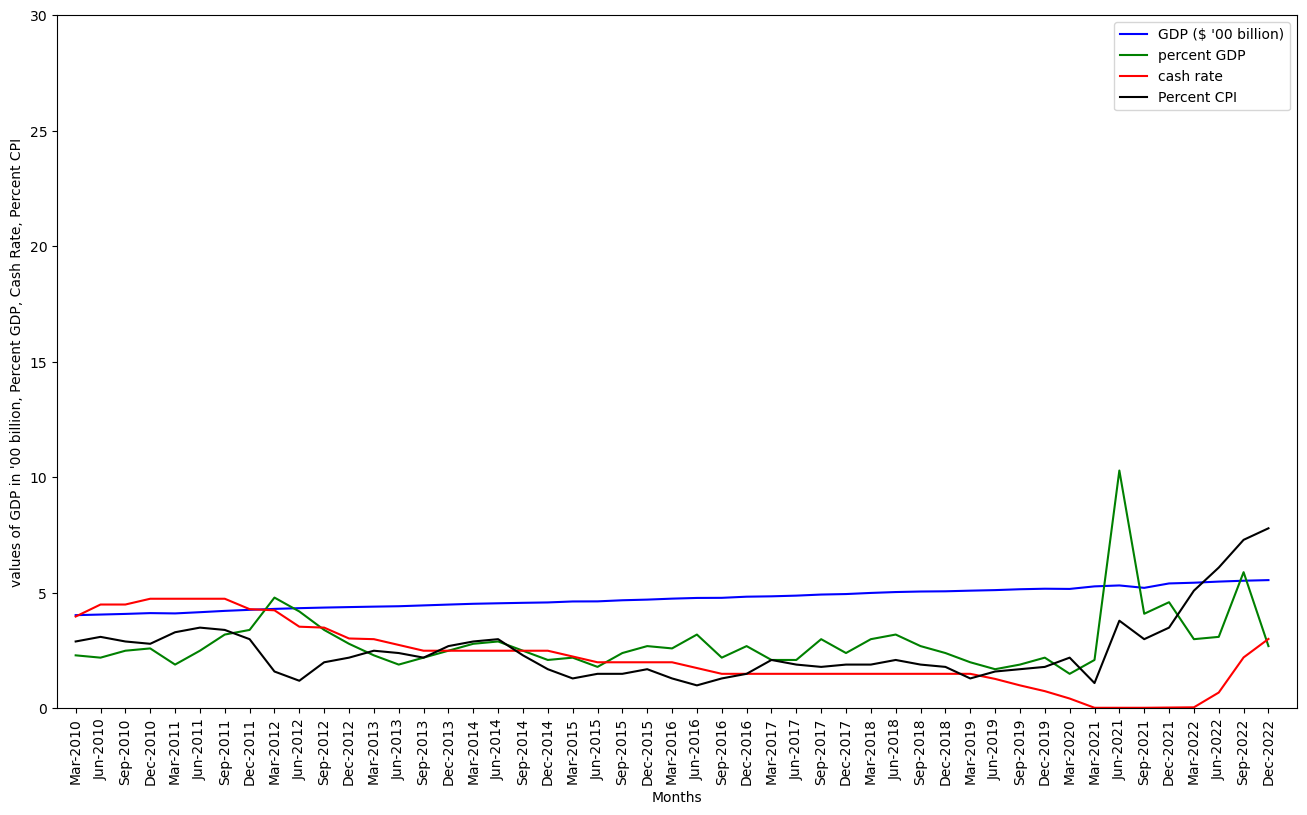

In [36]:
plt.figure(figsize = (16,9))
gdp_val8, = plt.plot(x_axis8, gdp_value8, color = "blue", label = "GDP ($ '00 billion)")
gdp_perc8, = plt.plot(x_axis8, gdp_rate8, color = "green", label = "percent GDP")
cashrate8 = plt.plot(x_axis8, cash_rate8,  color = "red", label = "cash rate")
cpi8, = plt.plot(x_axis8, cpi8, color = "black", label = "Percent CPI")
plt.legend(loc="best")
plt.xticks(filtered2_df["Month"], rotation="vertical")
plt.xlabel("Months")
plt.ylabel("values of GDP in '00 billion, Percent GDP, Cash Rate, Percent CPI")
plt.xlim(-0.75, len(x_axis8)+0.15)
plt.ylim(0,30)
plt.savefig("Output/GDP_CPI post 2010.png")
plt.show()